In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/yuzhaoxin/anaconda3/lib/python311.zip', '/Users/yuzhaoxin/anaconda3/lib/python3.11', '/Users/yuzhaoxin/anaconda3/lib/python3.11/lib-dynload', '', '/Users/yuzhaoxin/.venvs/first-venv/lib/python3.11/site-packages', '/Users/yuzhaoxin/Downloads/b1-coding-practical-mt24-main 3']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

var: 0.5
reference_depth: [ 0.          2.9239131   5.51432416  7.48758532  8.65202856  8.9358434
  8.39641558  7.20973438  5.64159015  4.00512537  2.61142659  1.72091746
  1.5031691   2.01140425  3.17564866  4.81554192  6.67072159  8.44392729
  9.84996868 10.66277828 10.75307162 10.11061551  8.84752915  7.18203021
  5.40512093  3.83540296  2.76909013  2.43306084  2.94833378  4.30973288
  6.38498424  8.93345286 11.64165764 14.17007897 16.20400695 17.50054627
 17.92449464 17.46755263 16.24792901 14.49047024 12.49048405 10.56696897
  9.01260615  8.04835863  7.78978173  8.23029238  9.24396757 10.6073632
 12.03684862 13.23550874 13.94215995 13.97469282 13.26084805 11.85151023
  9.91435723  7.70879856  5.54608736  3.74083483  2.56152303  2.1877885
  2.68120511  3.97419381  5.87885843  8.11443358 10.34912038 12.24983594
 13.53216395 14.00276265 13.5876664  12.34212299 10.44049644  8.14787894
  5.7779107   3.64345268  2.00786033  1.04449325  0.81078468  1.24089274
  2.15802395  3.30441962  4.

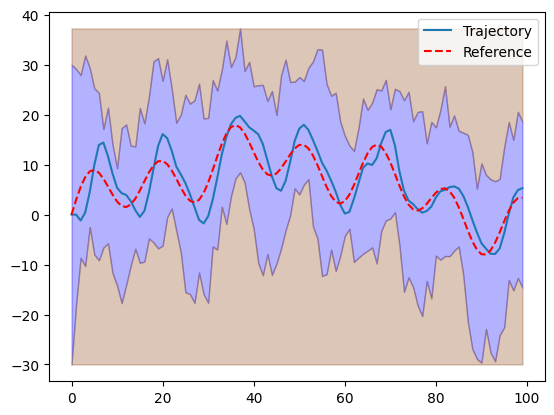

In [36]:
# Import relevant modules
import numpy as np
import matplotlib.pyplot as plt
from uuv_mission import control # to use PDController
from uuv_mission.dynamic import ClosedLoop, Submarine, Mission,Trajectory

# Initialize your submarine object (assumed to have get_depth and transition methods)
sub = Submarine()

# Initialize the PD controller
controller = control.PDController(K_P=0.15, K_D=0.6)

# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)

mission = Mission.from_csv("/Users/yuzhaoxin/Downloads/b1-coding-practical-mt24-main 3/data/mission.csv")  # You must implement this method in the Mission class

# Define the reference trajectory (from mission) and disturbances
#disturbances = abs(np.random.normal(0, 0.1, len(mission.reference)) ) # Example disturbances

trajectory = closed_loop.simulate_with_random_disturbances(mission)

#print(trajectory)
# Plot the mission results
trajectory.plot_completed_mission(mission)

In [25]:
trajectory.position

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  1.32810999e-02],
       [ 3.00000000e+00,  2.75191099e-02],
       [ 4.00000000e+00,  1.56033477e-01],
       [ 5.00000000e+00,  9.67397865e-02],
       [ 6.00000000e+00,  2.75896349e-02],
       [ 7.00000000e+00,  2.98967111e-02],
       [ 8.00000000e+00, -8.21646321e-02],
       [ 9.00000000e+00, -2.44598186e-01],
       [ 1.00000000e+01, -7.08116486e-01],
       [ 1.10000000e+01, -1.14690125e+00],
       [ 1.20000000e+01, -1.54269897e+00],
       [ 1.30000000e+01, -1.90224043e+00],
       [ 1.40000000e+01, -2.37406715e+00],
       [ 1.50000000e+01, -2.85228416e+00],
       [ 1.60000000e+01, -3.41403295e+00],
       [ 1.70000000e+01, -3.92046243e+00],
       [ 1.80000000e+01, -4.43781229e+00],
       [ 1.90000000e+01, -4.89506236e+00],
       [ 2.00000000e+01, -5.40800084e+00],
       [ 2.10000000e+01, -5.81392290e+00],
       [ 2.20000000e+01, -6.18780691e+00],
       [ 2.